## Importing, cleaning and preparing mosquito Data
1. Import libraries
2. Check filenames
3. Read in data
4. Explore data to understand structure, values within each dataframe
5. Search for and clean errors/inconsistencies
6. Merge dataframes - final format includes at minimum:
    SampleID, Species, Date, Town, County, TestType, Result, DayofYear

In [216]:
#Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [217]:
#Get filesnames to make sure to correctly ID files to read in
os.listdir("/Users/lbrown01/Dropbox/DataScienceStuff/Data/WNV_EE/") 

['DataRequest',
 'MATownLatLon.xlsx',
 '.DS_Store',
 'NSmos0419.csv',
 'papers',
 'WNVmos0419.csv',
 'NassauDataWithAllVariables.csv',
 'WNV_EEhumancases.xlsx',
 'MLscaffolddf.csv',
 'MosTowndat.csv',
 '2018-summary-of-surveillance.docx',
 'testMos.csv',
 'MATownLatLon.csv',
 'EEEmos0419.csv',
 'formatMos.csv',
 'negmos0419.csv']

In [239]:
#Read in mosquito data

#NSmos = mosquitos not sent (NS) for testing (but one error??)
NSmos = pd.read_csv("/Users/lbrown01/Dropbox/DataScienceStuff/Data/WNV_EE/NSmos0419.csv")

#negmos = mosquitos sent for testing, came back negative
negmos = pd.read_csv("/Users/lbrown01/Dropbox/DataScienceStuff/Data/WNV_EE/negmos0419.csv") #tested neg

#WNVmos = mosquitos sent for testing, postive for WNV
WNVmos = pd.read_csv("/Users/lbrown01/Dropbox/DataScienceStuff/Data/WNV_EE/WNVmos0419.csv") #WNV pos mosquitos

#EEEmos = mosquitos sent for testing, positive for EEE
EEEmos = pd.read_csv("/Users/lbrown01/Dropbox/DataScienceStuff/Data/WNV_EE/EEEmos0419.csv") #EEE pos mosquitos

### *NSmos* data  = mosquitos not sent (NS) for testing
#### Exploration/cleaning

In [241]:
#Get dimensions of dataframes, check for number of unique identifiers to check for duplicates
NSmos.shape

(161833, 10)

In [242]:
#how many species??
NSmos.Species.unique().shape

(58,)

In [243]:
#check for NAs in species column
#NSmos.Species[NSmos.Species.isna()] #less elegant approach but same result as line of code below
NSmos.Species.isna().sum()

0

In [244]:
#check for NAs in all columns
NSmos.isnull().sum()

Specimen_Type                 0
Sample_ID                     1
Species                       0
Received_Date                 0
Town                          1
State                         0
County                        1
Test_Type                153884
Result                   161831
Submitted_for_Testing         0
dtype: int64

In [245]:
#check that no Species IDs are blank (rather than explicitly marked as NA)
NSmos[NSmos['Species'] == '']

,Specimen_Type,Sample_ID,Species,Received_Date,Town,State,County,Test_Type,Result,Submitted_for_Testing


In [246]:
#get names of unique species
NSmos.Species.unique()

array(['No_Collections_Recorded', 'Culex_restuans',
       'Ochlerotatus_excrucians', 'Ochlerotatus_japonicus',
       'Aedes_vexans', 'Aedes_cinereus', 'Ochlerotatus_canadensis',
       'Anopheles_punctipennis', 'Ochlerotatus_cantator',
       'Ochlerotatus_abserratus', 'Culiseta_impatiens',
       'Ochlerotatus_atropalpus', 'Culex_species',
       'Ochlerotatus_triseriatus', 'Anopheles_walkeri',
       'Coquillettidia_perturbans', 'Ochlerotatus_trivittatus',
       'Culiseta_morsitans', 'Culex_pipiens', 'Culex_territans',
       'Culiseta_melanura', 'Anopheles_quadrimaculatus_sl',
       'Uranotaenia_sapphirina', 'Culex_pipiens/restuans_complex',
       'Ochlerotatus_taeniorhynchus', 'Anopheles_bradleyi/crucians',
       'Ochlerotatus_sollicitans', 'Culiseta_sp', 'Psorophora_ferox',
       'Culex_salinarius', 'Psorophora_ciliata', 'Ochlerotatus_provocans',
       'Ochlerotatus_fitchii', 'Ochlerotatus_stimulans',
       'Ochlerotatus_sticticus', 'Ochlerotatus_aurifer', 'Mixed_Species'

In [255]:
#get number of unique mosquitos captured (not tested)
NSmos.Sample_ID.nunique()

161831

In [248]:
#explore first 5 lines of dataframe
NSmos.head(5)

,Specimen_Type,Sample_ID,Species,Received_Date,Town,State,County,Test_Type,Result,Submitted_for_Testing
0,Mosquito,PY04NS-0001,No_Collections_Recorded,5/25/04,Kingston,MA,Plymouth,Not_Tested,NaN,No
1,Mosquito,PY04NS-0002,No_Collections_Recorded,5/25/04,Plympton,MA,Plymouth,Not_Tested,NaN,No
2,Mosquito,PY04NS-0003,Culex_restuans,5/25/04,Wareham,MA,Plymouth,Not_Tested,NaN,No
3,Mosquito,PY04NS-0004,No_Collections_Recorded,5/27/04,Abington,MA,Plymouth,Not_Tested,NaN,No
4,Mosquito,PY04NS-0005,Culex_restuans,5/27/04,Brockton,MA,Plymouth,Not_Tested,NaN,No


I want to merge dataframes by SampleID, so search and review duplicates

In [256]:
NSmos[NSmos.duplicated(['Sample_ID'],keep=False)] #look at duplicate sampleIDs

,Specimen_Type,Sample_ID,Species,Received_Date,Town,State,County,Test_Type,Result,Submitted_for_Testing


Tested mosquitos were tested for both WNV & EEE; typical notation under "Test_Type" is "WNV,EEE"; this seems to be a unique instance in the dataframe
This file contains mosquitos that were not tested, so this is either an error and this individual does not belong in this dataframe (negative for both EEE and WNV) or it was not submmitted for testing.  
***Flagged, checked for sample ID CM08-0547 in negmos dataframe, not in tested mosquitos, okay to drop duplicate***

In [250]:
#Again, confirms that all mosquitos in this dataframe were not tested except the unique ID CM08-0547 checked in negmos
NSmos.Test_Type.value_counts() #this command doesn't include number of NAs

Not_Tested      7947
WNV,_RTD-PCR       1
EEE,_RTD-PCR       1
Name: Test_Type, dtype: int64

In [251]:
NSmos.Result.value_counts() 
#2 samples reported as negative, but also reported as not submitted 
#for testing, these are the duplicares above

Negative    2
Name: Result, dtype: int64

In [252]:
NSmos.Submitted_for_Testing.value_counts() #with the exception of error above, none submitted for testing

No    161833
Name: Submitted_for_Testing, dtype: int64

In [253]:
NSmos.drop_duplicates(subset ="Sample_ID", inplace = True) 

In [254]:
NSmos.shape

(161832, 10)

### *Negmos* data = mosquitos sent for testing, came back negative
#### Exploration/cleaning

In [257]:
negmos = pd.read_csv("/Users/lbrown01/Dropbox/DataScienceStuff/Data/WNV_EE/negmos0419.csv") #tested neg

In [258]:
negmos.shape

(102138, 9)

In [259]:
negmos.Sample_ID.nunique() #should be size of dataframe when dupliates are removed

94409

In [260]:
102138-94409 #7729 are duplicate sample IDs

7729

In [261]:
#check duplicated values in negmos to see if they seem to be actual duplicates and need to be dropped
test = negmos[negmos.duplicated(['Sample_ID'],keep=False)]

In [262]:
test.shape
#7729*2 = 15458

(15428, 9)

In [263]:
test.sort_values(by='Sample_ID') 

,Specimen_Type,Sample_ID,Species,Tested_Date,Town,State,County,Test_Type,Result
177,Mosquito,BR04-00001,Culex_restuans,6/11/04,Dighton,MA,Bristol,"EEE,_WNv",Negative
176,Mosquito,BR04-00001,Culex_restuans,6/11/04,Dighton,MA,Bristol,"EEE,_WNv",Negative
179,Mosquito,BR04-00002,Aedes_vexans,6/11/04,Dighton,MA,Bristol,"EEE,_WNv",Negative
178,Mosquito,BR04-00002,Aedes_vexans,6/11/04,Dighton,MA,Bristol,"EEE,_WNv",Negative
864,Mosquito,BR04-00003,Culex_pipiens,6/18/04,Norton,MA,Bristol,"EEE,_WNv",Negative
863,Mosquito,BR04-00003,Culex_pipiens,6/18/04,Norton,MA,Bristol,"EEE,_WNv",Negative
866,Mosquito,BR04-00004,Culex_pipiens,6/18/04,Taunton,MA,Bristol,"EEE,_WNv",Negative
865,Mosquito,BR04-00004,Culex_pipiens,6/18/04,Taunton,MA,Bristol,"EEE,_WNv",Negative
868,Mosquito,BR04-00005,Culex_restuans,6/18/04,Dighton,MA,Bristol,"EEE,_WNv",Negative
867,Mosquito,BR04-00005,Culex_restuans,6/18/04,Dighton,MA,Bristol,"EEE,_WNv",Negative


In [264]:
#here duplicates seem to be the same ID, so drop duplicates below
negmos.shape #102138
test.shape #15428

(15428, 9)

In [265]:
negmos[negmos.duplicated(['Sample_ID'],keep=False)].shape

(15428, 9)

Filter out duplicates sample IDs

In [266]:
negmos.drop_duplicates(subset ="Sample_ID", inplace = True) 

In [267]:
negmos.shape
#102138-15428 = 86710
#102138-94409 = 7729 #number of duplicates, so the above worked to remove duplicates :)

(94409, 9)

In [268]:
negmos.Species.unique()

array(['Culex_restuans', 'Culiseta_melanura', 'Ochlerotatus_excrucians',
       'Ochlerotatus_canadensis', 'Ochlerotatus_japonicus',
       'Culex_species', 'Ochlerotatus_abserratus', 'Aedes_cinereus',
       'Culex_salinarius', 'Ochlerotatus_cantator',
       'Culex_pipiens/restuans_complex', 'Culex_territans',
       'Culex_pipiens', 'Aedes_vexans', 'Culiseta_impatiens',
       'Anopheles_walkeri', 'Culiseta_morsitans',
       'Ochlerotatus_triseriatus', 'Uranotaenia_sapphirina',
       'Coquillettidia_perturbans', 'Ochlerotatus_aurifer',
       'Ochlerotatus_trivittatus', 'Anopheles_punctipennis',
       'Anopheles_quadrimaculatus_sl', 'Ochlerotatus_sollicitans',
       'Psorophora_ferox', 'Ochlerotatus_atropalpus', 'Anopheles_barberi',
       'Ochlerotatus_taeniorhynchus', 'Anopheles_earlei',
       'Anopheles_crucians', 'Ochlerotatus_sticticus',
       'Ochlerotatus_intrudens', 'Ochlerotatus_provocans',
       'Ochlerotatus_punctor', 'Culiseta_minnesotae',
       'Ochlerotatus_imp

In [269]:
negmos.Species.isna().sum()
#negmos[NSmos['Species'] == '']

0

In [270]:
#check that all are listed as same for test type; yes
negmos.Test_Type.value_counts()

EEE,_WNv    94409
Name: Test_Type, dtype: int64

In [271]:
#check that all are negative; yes
negmos.Result.value_counts()

Negative    94409
Name: Result, dtype: int64

### *WNVmos* data = mosquitos sent for testing, postive for WNV

#### Exploration/cleaning

In [272]:
WNVmos.shape

(2799, 9)

In [273]:
WNVmos.Sample_ID.nunique()

2785

In [274]:
#here, duplicates are the same or only differ by a couple of days
WNVmos[WNVmos.duplicated(['Sample_ID'],keep=False)]

,Specimen_Type,Sample_ID,Species,Tested_Date,Town,State,County,Test_Type,Result
0,mosquito,SU04-07310,Culex_restuans,8/5/04,Boston,MA,Suffolk,WNv,Positive
1,mosquito,SU04-07310,Culex_restuans,8/5/04,Boston,MA,Suffolk,WNv,Positive
2,mosquito,NM04-05252,Culex_pipiens,8/17/04,Revere,MA,Suffolk,WNv,Positive
3,mosquito,NM04-05252,Culex_pipiens,8/17/04,Revere,MA,Suffolk,WNv,Positive
4,mosquito,PY04-06202,Culex_pipiens/restuans_complex,8/19/04,Kingston,MA,Plymouth,WNv,Positive
5,mosquito,PY04-06202,Culex_pipiens/restuans_complex,8/18/04,Kingston,MA,Plymouth,WNv,Positive
6,mosquito,EM04-03295,Culex_pipiens/restuans_complex,8/23/04,Medford,MA,Middlesex,WNv,Positive
7,mosquito,EM04-03295,Culex_pipiens/restuans_complex,8/23/04,Medford,MA,Middlesex,WNv,Positive
8,mosquito,NM04-05309,Culex_pipiens,8/27/04,Revere,MA,Suffolk,WNv,Positive
9,mosquito,NM04-05309,Culex_pipiens,8/24/04,Revere,MA,Suffolk,WNv,Positive


In [275]:
WNVmos.drop_duplicates(subset ="Sample_ID", keep = 'first', inplace = True) 

### *EEEmos* data = mosquitos sent for testing, postive for EEE
#### Exploration/cleaning

In [276]:
EEEmos.shape

(1274, 9)

In [277]:
EEEmos.Sample_ID.nunique() #no duplicates, hooray

1274

### Merge dataframes by Sample_ID
#### Final columns: 
Specimen_Type, Sample_ID, Species, Date, Town, Statem County, Test_Type, Result, Submitted_for_Testing

1. Make sure all of the columns I want are in each dataframe, cut/add additional columns
2. Merge by SampleID

In [278]:
list(NSmos.columns)

['Specimen_Type',
 'Sample_ID',
 'Species',
 'Received_Date',
 'Town',
 'State',
 'County',
 'Test_Type',
 'Result',
 'Submitted_for_Testing']

In [279]:
list(negmos.columns)

['Specimen_Type',
 'Sample_ID',
 'Species',
 'Tested_Date',
 'Town',
 'State',
 'County',
 'Test_Type',
 'Result']

In [280]:
list(WNVmos.columns)

['Specimen_Type',
 'Sample_ID',
 'Species',
 'Tested_Date',
 'Town',
 'State',
 'County',
 'Test_Type',
 'Result']

In [281]:
list(EEEmos.columns)

['Specimen_Type',
 'Sample_ID',
 'Species',
 'Tested_Date',
 'Town',
 'State',
 'County',
 'Test_Type',
 'Result']

In [282]:
#rename date columns throughout to simply "Date"
NSmos2 = NSmos.rename(columns={"Received_Date": "Date"})
negmos2 = negmos.rename(columns={"Tested_Date": "Date"})
WNVmos2 = WNVmos.rename(columns={"Tested_Date": "Date"})
EEEmos2 = EEEmos.rename(columns={"Tested_Date": "Date"})

All dataframes have the same columns, except NSmos2 has an additional "Submitted_for_Testing" column, 

In [283]:
NSmos2.shape

(161832, 10)

In [284]:
negmos2['Submitted_for_Testing']='Yes'
EEEmos2['Submitted_for_Testing']='Yes'
WNVmos2['Submitted_for_Testing']='Yes'

In [285]:
negmos2.head(5)

,Specimen_Type,Sample_ID,Species,Date,Town,State,County,Test_Type,Result,Submitted_for_Testing
0,Mosquito,CE04-02000,Culex_restuans,6/2/04,Hopkinton,MA,Middlesex,"EEE,_WNv",Negative,Yes
1,Mosquito,CE04-02002,Culex_restuans,6/2/04,Southborough,MA,Worcester,"EEE,_WNv",Negative,Yes
2,Mosquito,CE04-02003,Culex_restuans,6/2/04,Marlborough,MA,Middlesex,"EEE,_WNv",Negative,Yes
3,Mosquito,CE04-02004,Culex_restuans,6/2/04,Westborough,MA,Worcester,"EEE,_WNv",Negative,Yes
4,Mosquito,CE04-02005,Culiseta_melanura,6/2/04,Westborough,MA,Worcester,"EEE,_WNv",Negative,Yes


In [286]:
WNVmos2.head(5)

,Specimen_Type,Sample_ID,Species,Date,Town,State,County,Test_Type,Result,Submitted_for_Testing
0,mosquito,SU04-07310,Culex_restuans,8/5/04,Boston,MA,Suffolk,WNv,Positive,Yes
2,mosquito,NM04-05252,Culex_pipiens,8/17/04,Revere,MA,Suffolk,WNv,Positive,Yes
4,mosquito,PY04-06202,Culex_pipiens/restuans_complex,8/19/04,Kingston,MA,Plymouth,WNv,Positive,Yes
6,mosquito,EM04-03295,Culex_pipiens/restuans_complex,8/23/04,Medford,MA,Middlesex,WNv,Positive,Yes
8,mosquito,NM04-05309,Culex_pipiens,8/27/04,Revere,MA,Suffolk,WNv,Positive,Yes


In [287]:
EEEmos2.head(5)

,Specimen_Type,Sample_ID,Species,Date,Town,State,County,Test_Type,Result,Submitted_for_Testing
0,Mosquito,SL04-0001,Culiseta_melanura,8/2/04,Easton,MA,Bristol,EEE,Positive,Yes
1,Mosquito,SL04-0002,Culex_species,8/4/04,Middleborough,MA,Plymouth,EEE,Positive,Yes
2,Mosquito,SL04-0003,Culiseta_melanura,8/4/04,Easton,MA,Bristol,EEE,Positive,Yes
3,Mosquito,SL04-0004,Culiseta_melanura,8/4/04,Easton,MA,Bristol,EEE,Positive,Yes
4,Mosquito,SL04-0005,Culiseta_melanura,8/5/04,Halifax,MA,Plymouth,EEE,Positive,Yes


#### Final mosquito data dataframe
Merge positive tested, negative tested, and not tested mosquitos

In [288]:
testdf = pd.concat([EEEmos2, WNVmos2, negmos2, NSmos2])
testdf.shape

(260300, 10)

In [289]:
#get number of duplicates
testdf[testdf.duplicated(['Sample_ID'],keep=False)].shape

(2016, 10)

In [290]:
#create new dataframe of only duplicated sample IDs and 
test = testdf[testdf.duplicated(['Sample_ID'],keep=False)]

In [291]:
#other repeated values seem to be only 
test.sort_values(by=['Sample_ID'])

,Specimen_Type,Sample_ID,Species,Date,Town,State,County,Test_Type,Result,Submitted_for_Testing
266,Mosquito,SL08-0001,Culiseta_melanura,8/15/08,Carver,MA,Plymouth,EEE,Positive,Yes
39971,Mosquito,SL08-0001,Culiseta_melanura,6/9/08,Kingston,MA,Plymouth,"EEE,_WNv",Negative,Yes
39972,Mosquito,SL08-0002,Culex_pipiens/restuans_complex,6/9/08,Boston,MA,Suffolk,"EEE,_WNv",Negative,Yes
267,Mosquito,SL08-0002,Culiseta_melanura,8/18/08,Berkley,MA,Bristol,EEE,Positive,Yes
39973,Mosquito,SL08-0003,Culiseta_melanura,6/9/08,Raynham,MA,Bristol,"EEE,_WNv",Negative,Yes
268,Mosquito,SL08-0003,Culiseta_melanura,9/8/08,Halifax,MA,Plymouth,EEE,Positive,Yes
39974,Mosquito,SL08-0004,Culiseta_melanura,6/9/08,New_Bedford,MA,Bristol,"EEE,_WNv",Negative,Yes
269,Mosquito,SL08-0004,Culiseta_melanura,9/10/08,Raynham,MA,Bristol,EEE,Positive,Yes
39975,Mosquito,SL08-0005,Culiseta_melanura,6/9/08,Easton,MA,Bristol,"EEE,_WNv",Negative,Yes
270,Mosquito,SL08-0005,Culiseta_melanura,9/18/08,New_Bedford,MA,Bristol,EEE,Positive,Yes


In [303]:
testdf.shape 
#161832+94409+2785+1274 = 260300

(260300, 11)

In [304]:
testdf['Date'] =  pd.to_datetime(testdf['Date'])

In [305]:
testdf.head(5)

,Specimen_Type,Sample_ID,Species,Date,Town,State,County,Test_Type,Result,Submitted_for_Testing,DOY
0,Mosquito,SL04-0001,Culiseta_melanura,2004-08-02,Easton,MA,Bristol,EEE,Positive,Yes,215
1,Mosquito,SL04-0002,Culex_species,2004-08-04,Middleborough,MA,Plymouth,EEE,Positive,Yes,217
2,Mosquito,SL04-0003,Culiseta_melanura,2004-08-04,Easton,MA,Bristol,EEE,Positive,Yes,217
3,Mosquito,SL04-0004,Culiseta_melanura,2004-08-04,Easton,MA,Bristol,EEE,Positive,Yes,217
4,Mosquito,SL04-0005,Culiseta_melanura,2004-08-05,Halifax,MA,Plymouth,EEE,Positive,Yes,218


In [298]:
# calculate day of year and add as new column to dataframe
testdf['DOY'] = testdf['Date'].dt.dayofyear

In [306]:
testdf.head(5)

,Specimen_Type,Sample_ID,Species,Date,Town,State,County,Test_Type,Result,Submitted_for_Testing,DOY
0,Mosquito,SL04-0001,Culiseta_melanura,2004-08-02,Easton,MA,Bristol,EEE,Positive,Yes,215
1,Mosquito,SL04-0002,Culex_species,2004-08-04,Middleborough,MA,Plymouth,EEE,Positive,Yes,217
2,Mosquito,SL04-0003,Culiseta_melanura,2004-08-04,Easton,MA,Bristol,EEE,Positive,Yes,217
3,Mosquito,SL04-0004,Culiseta_melanura,2004-08-04,Easton,MA,Bristol,EEE,Positive,Yes,217
4,Mosquito,SL04-0005,Culiseta_melanura,2004-08-05,Halifax,MA,Plymouth,EEE,Positive,Yes,218


In [301]:
#iterate through the following lines of code (#-ing out all except one at a time to check that all columns have a species ID
testdf.Species.isna().sum() #0
#testdf[testdf['Species'] == '']
testdf.Species.nunique() #60

0

In [125]:
testdf.Species.unique()

array(['Culiseta_melanura', 'Culex_species',
       'Culex_pipiens/restuans_complex', 'Ochlerotatus_canadensis',
       'Coquillettidia_perturbans', 'Ochlerotatus_japonicus',
       'Culex_salinarius', 'Aedes_vexans', 'Culiseta_morsitans',
       'Culiseta_minnesotae', 'Culex_territans', 'Uranotaenia_sapphirina',
       'Culex_restuans', 'Culex_pipiens', 'Ochlerotatus_taeniorhynchus',
       'Ochlerotatus_sollicitans', 'Ochlerotatus_triseriatus',
       'Anopheles_quadrimaculatus_sl', 'Ochlerotatus_excrucians',
       'Ochlerotatus_abserratus', 'Aedes_cinereus',
       'Ochlerotatus_cantator', 'Culiseta_impatiens', 'Anopheles_walkeri',
       'Ochlerotatus_aurifer', 'Ochlerotatus_trivittatus',
       'Anopheles_punctipennis', 'Psorophora_ferox',
       'Ochlerotatus_atropalpus', 'Anopheles_barberi', 'Anopheles_earlei',
       'Anopheles_crucians', 'Ochlerotatus_sticticus',
       'Ochlerotatus_intrudens', 'Ochlerotatus_provocans',
       'Ochlerotatus_punctor', 'Ochlerotatus_implicatus

#### Check for duplicates in new dataframe

In [302]:
#There are duplicates but duplicated sample numbers seemt to all be from different towns
testdf.Sample_ID.nunique() 

259291

In [142]:
#testdf[testdf.duplicated(['Sample_ID'],keep=False)]

,Specimen_Type,Sample_ID,Species,Date,Town,State,County,Test_Type,Result,Submitted_for_Testing,DOY
266,Mosquito,SL08-0001,Culiseta_melanura,2008-08-15,Carver,MA,Plymouth,EEE,Positive,Yes,228
267,Mosquito,SL08-0002,Culiseta_melanura,2008-08-18,Berkley,MA,Bristol,EEE,Positive,Yes,231
268,Mosquito,SL08-0003,Culiseta_melanura,2008-09-08,Halifax,MA,Plymouth,EEE,Positive,Yes,252
269,Mosquito,SL08-0004,Culiseta_melanura,2008-09-10,Raynham,MA,Bristol,EEE,Positive,Yes,254
270,Mosquito,SL08-0005,Culiseta_melanura,2008-09-18,New_Bedford,MA,Bristol,EEE,Positive,Yes,262
271,Mosquito,SL08-0006,Culiseta_melanura,2008-09-18,New_Bedford,MA,Bristol,EEE,Positive,Yes,262
272,Mosquito,SL08-0007,Culiseta_melanura,2008-09-18,New_Bedford,MA,Bristol,EEE,Positive,Yes,262
273,Mosquito,SL08-0008,Ochlerotatus_canadensis,2008-09-18,New_Bedford,MA,Bristol,EEE,Positive,Yes,262
274,Mosquito,SL08-0009,Culiseta_melanura,2008-09-23,Freetown,MA,Bristol,EEE,Positive,Yes,267
275,Mosquito,SL08-0010,Culiseta_melanura,2008-09-23,Freetown,MA,Bristol,EEE,Positive,Yes,267


In [127]:
testdf2 = testdf[testdf.duplicated(['Sample_ID'])]

In [131]:
testdf2.shape

(1008, 11)

In [128]:
260300-259291-1 #size of testdf - number of duplicates

1008

In [484]:
testdf2.sort_values(by=['Sample_ID'])

,Specimen_Type,Sample_ID,Species,Date,Town,State,County,Test_Type,Result,Submitted_for_Testing,DOY
39971,Mosquito,SL08-0001,Culiseta_melanura,2008-06-09,Kingston,MA,Plymouth,"EEE,_WNv",Negative,Yes,161
39972,Mosquito,SL08-0002,Culex_pipiens/restuans_complex,2008-06-09,Boston,MA,Suffolk,"EEE,_WNv",Negative,Yes,161
39973,Mosquito,SL08-0003,Culiseta_melanura,2008-06-09,Raynham,MA,Bristol,"EEE,_WNv",Negative,Yes,161
39974,Mosquito,SL08-0004,Culiseta_melanura,2008-06-09,New_Bedford,MA,Bristol,"EEE,_WNv",Negative,Yes,161
39975,Mosquito,SL08-0005,Culiseta_melanura,2008-06-09,Easton,MA,Bristol,"EEE,_WNv",Negative,Yes,161
39976,Mosquito,SL08-0006,Culiseta_melanura,2008-06-09,Kingston,MA,Plymouth,"EEE,_WNv",Negative,Yes,161
40000,Mosquito,SL08-0007,Culex_pipiens/restuans_complex,2008-06-11,Brookline,MA,Norfolk,"EEE,_WNv",Negative,Yes,163
40001,Mosquito,SL08-0008,Culiseta_melanura,2008-06-11,Kingston,MA,Plymouth,"EEE,_WNv",Negative,Yes,163
40002,Mosquito,SL08-0009,Culiseta_melanura,2008-06-11,Carver,MA,Plymouth,"EEE,_WNv",Negative,Yes,163
40003,Mosquito,SL08-0010,Culiseta_melanura,2008-06-11,Kingston,MA,Plymouth,"EEE,_WNv",Negative,Yes,163


In [307]:
testdf[testdf['Sample_ID'] == 'SL08-0010']

,Specimen_Type,Sample_ID,Species,Date,Town,State,County,Test_Type,Result,Submitted_for_Testing,DOY
275,Mosquito,SL08-0010,Culiseta_melanura,2008-09-23,Freetown,MA,Bristol,EEE,Positive,Yes,267
40003,Mosquito,SL08-0010,Culiseta_melanura,2008-06-11,Kingston,MA,Plymouth,"EEE,_WNv",Negative,Yes,163


In [308]:
testdf2.Sample_ID.nunique()

NameError: name 'testdf2' is not defined

In [486]:
testdf.describe() #Day of year ranging from day 90-311 (approx Mar 31/Apr 1 - Nov 7/8)

,DOY
count,260300.000000
mean,214.197027
std,33.367734
min,90.000000
25%,189.000000
50%,215.000000
75%,240.000000
max,311.000000


/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


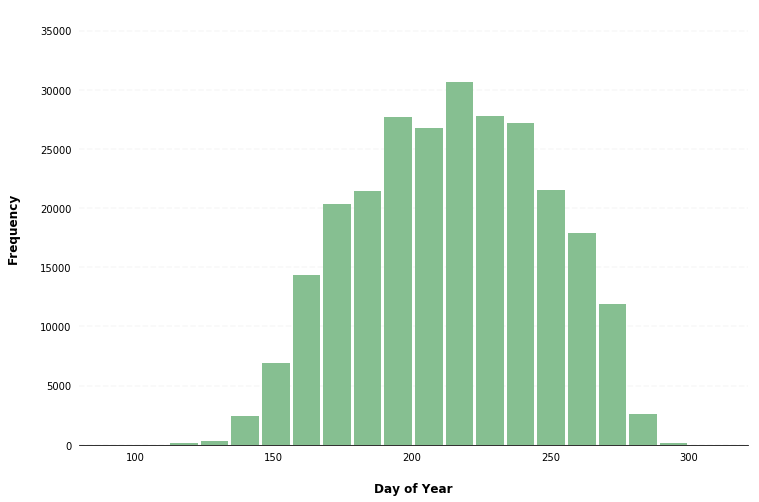

In [309]:
expl = testdf.hist(column='DOY', bins=20, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

expl = expl[0]
for x in expl:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)
    
    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Day of Year", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

In [488]:
testdf.sort_values('DOY')

,Specimen_Type,Sample_ID,Species,Date,Town,State,County,Test_Type,Result,Submitted_for_Testing,DOY
102516,Mosquito,EM17NS-0186,Ochlerotatus_abserratus,2017-03-31,North_Reading,MA,Middlesex,NaN,NaN,No,90
102517,Mosquito,EM17NS-0187,Ochlerotatus_canadensis,2017-03-31,North_Reading,MA,Middlesex,NaN,NaN,No,90
102518,Mosquito,EM17NS-0188,Ochlerotatus_excrucians,2017-03-31,North_Reading,MA,Middlesex,NaN,NaN,No,90
102519,Mosquito,EM17NS-0189,Ochlerotatus_japonicus,2017-03-31,North_Reading,MA,Middlesex,NaN,NaN,No,90
102520,Mosquito,EM17NS-0190,Aedes_cinereus,2017-03-31,North_Reading,MA,Middlesex,NaN,NaN,No,90
102521,Mosquito,EM17NS-0191,Anopheles_punctipennis,2017-03-31,North_Reading,MA,Middlesex,NaN,NaN,No,90
56259,Mosquito,NM12NS-6250,No_Collections_Recorded,2012-04-30,Marblehead,MA,Essex,NaN,NaN,No,121
56258,Mosquito,NM12NS-6199,No_Collections_Recorded,2012-04-30,Newburyport,MA,Essex,NaN,NaN,No,121
56257,Mosquito,NM12NS-6112,No_Collections_Recorded,2012-04-30,West_Newbury,MA,Essex,NaN,NaN,No,121
56256,Mosquito,NM12NS-6055,No_Collections_Recorded,2012-04-30,Salisbury,MA,Essex,NaN,NaN,No,121


In [310]:
#create a new column that only includes the year of capture
testdf['Year'] = testdf['Date'].dt.year

In [311]:
testdf.head(5)

,Specimen_Type,Sample_ID,Species,Date,Town,State,County,Test_Type,Result,Submitted_for_Testing,DOY,Year
0,Mosquito,SL04-0001,Culiseta_melanura,2004-08-02,Easton,MA,Bristol,EEE,Positive,Yes,215,2004
1,Mosquito,SL04-0002,Culex_species,2004-08-04,Middleborough,MA,Plymouth,EEE,Positive,Yes,217,2004
2,Mosquito,SL04-0003,Culiseta_melanura,2004-08-04,Easton,MA,Bristol,EEE,Positive,Yes,217,2004
3,Mosquito,SL04-0004,Culiseta_melanura,2004-08-04,Easton,MA,Bristol,EEE,Positive,Yes,217,2004
4,Mosquito,SL04-0005,Culiseta_melanura,2004-08-05,Halifax,MA,Plymouth,EEE,Positive,Yes,218,2004


In [312]:
testdf[(testdf['Town']=='Brewster') & (testdf['Year']==2017)]
#check:
#manually changed SampleID CCNS17-0073 from 1-15-2017 to 6-15-2017 in original file(s)

,Specimen_Type,Sample_ID,Species,Date,Town,State,County,Test_Type,Result,Submitted_for_Testing,DOY,Year
84891,Mosquito,CC17-0111,Coquillettidia_perturbans,2017-07-19,Brewster,MA,Barnstable,"EEE,_WNv",Negative,Yes,200,2017
86731,Mosquito,CC17-0196,Coquillettidia_perturbans,2017-08-16,Brewster,MA,Barnstable,"EEE,_WNv",Negative,Yes,228,2017
86732,Mosquito,CC17-0197,Coquillettidia_perturbans,2017-08-16,Brewster,MA,Barnstable,"EEE,_WNv",Negative,Yes,228,2017
102515,Mosquito,CCNS17-0073,Ochlerotatus_aurifer,2017-06-15,Brewster,MA,Barnstable,NaN,NaN,No,166,2017
103882,Mosquito,CCNS17-0035,Ochlerotatus_aurifer,2017-06-08,Brewster,MA,Barnstable,NaN,NaN,No,159,2017
103888,Mosquito,CCNS17-0041,Ochlerotatus_abserratus,2017-06-08,Brewster,MA,Barnstable,NaN,NaN,No,159,2017
103889,Mosquito,CCNS17-0042,Ochlerotatus_canadensis,2017-06-08,Brewster,MA,Barnstable,NaN,NaN,No,159,2017
105105,Mosquito,CCNS17-0071,Ochlerotatus_japonicus,2017-06-15,Brewster,MA,Barnstable,NaN,NaN,No,166,2017
105106,Mosquito,CCNS17-0072,Ochlerotatus_excrucians,2017-06-15,Brewster,MA,Barnstable,NaN,NaN,No,166,2017
105107,Mosquito,CCNS17-0074,Ochlerotatus_canadensis,2017-06-15,Brewster,MA,Barnstable,NaN,NaN,No,166,2017


In [313]:
#write new dataframe to file for easier reading in later
testdf.to_csv("/Users/lbrown01/Dropbox/DataScienceStuff/Data/WNV_EE/formatMos.csv", encoding='utf-8', index=False)